In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("AAPL(80-24) Final.csv")


In [3]:
df.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,03/27/2024,173.31,170.30,173.58,170.14,59.11M,2.12%
1,03/26/2024,169.71,170.01,171.41,169.65,57.22M,-0.67%
2,03/25/2024,170.85,170.37,171.94,169.46,54.21M,-0.83%
3,03/22/2024,172.28,171.76,173.05,170.06,71.16M,0.53%
4,03/21/2024,171.37,177.05,177.49,170.84,106.18M,-4.09%


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10912 entries, 0 to 10911
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      10912 non-null  object 
 1   Price     10912 non-null  float64
 2   Open      10912 non-null  float64
 3   High      10912 non-null  float64
 4   Low       10912 non-null  float64
 5   Vol.      10911 non-null  object 
 6   Change %  10912 non-null  object 
dtypes: float64(4), object(3)
memory usage: 596.9+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])


In [6]:
df = df.sort_values('Date')


In [7]:
df.isnull().sum()


,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,1
Change %,0


In [8]:
df.dropna(inplace=True)


In [12]:
X = df[['Open', 'High', 'Low', 'Vol.']]
y = df['Price']


In [14]:
def convert_volume(vol):
    if isinstance(vol, str):
        vol = vol.replace(',', '').strip()
        if 'B' in vol:
            return float(vol.replace('B', '')) * 1_000_000_000
        elif 'M' in vol:
            return float(vol.replace('M', '')) * 1_000_000
        elif 'K' in vol:
            return float(vol.replace('K', '')) * 1_000
        else:
            return float(vol)
    return vol


In [15]:
df['Vol.'] = df['Vol.'].apply(convert_volume)


In [18]:
df.dropna(inplace=True)


In [19]:
X = df[['Open', 'High', 'Low', 'Vol.']]
y = df['Price']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
model = LinearRegression()


In [22]:
model.fit(X_train, y_train)


LinearRegression()

In [23]:
y_pred = model.predict(X_test)


In [24]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0852179898631588


In [25]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.9999535359113211


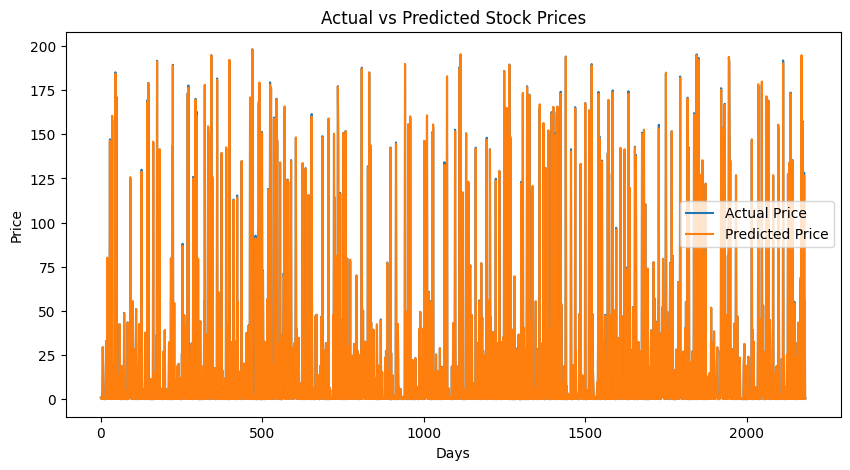

In [26]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.legend()
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()


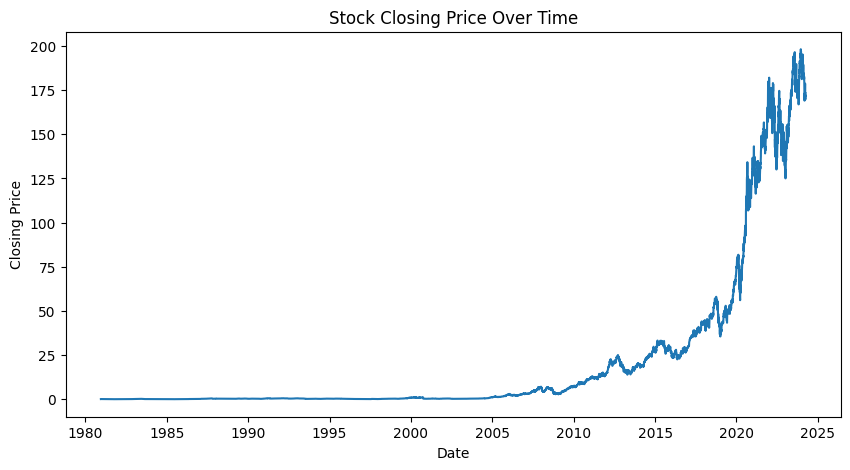

In [28]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Price'])
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()


In [29]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')


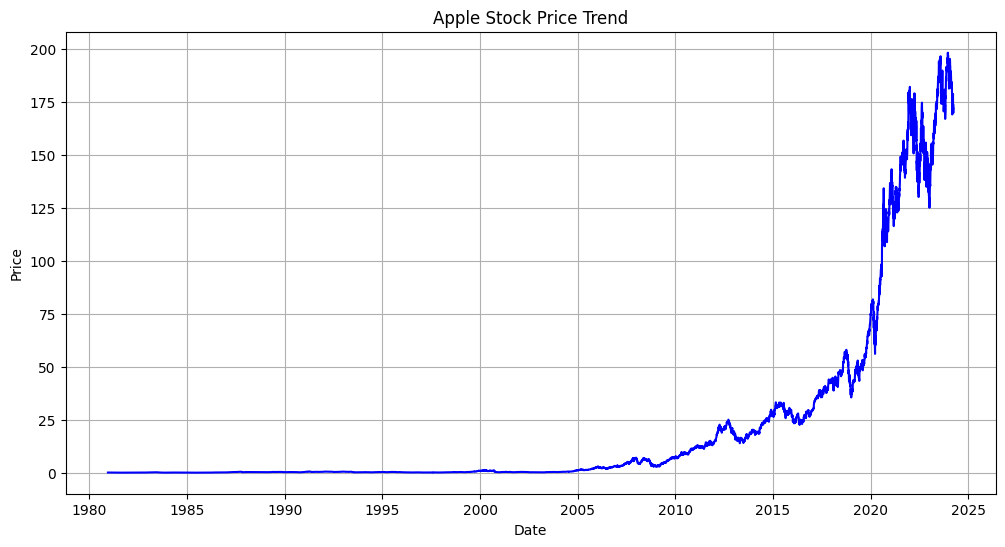

In [30]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Price'], color='blue')
plt.title("Apple Stock Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()
